In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./data/revenue_distribution_by_sector.csv')
d1 = df["entity_id"].describe()
d2 = df["nace_level_1_code"].describe()
d3 = df["nace_level_1_name"].describe()
d4 = df["nace_level_2_code"].describe()
d5 = df["nace_level_2_name"].describe()
d6 = df["revenue_pct"].describe()
display(d1)
display(d2)
display(d3)
display(d4)
display(d5)
display(d6)
print(df["entity_id"].nunique())

count      799.000000
mean      3022.657071
std       2451.801339
min         29.000000
25%       1477.000000
50%       2349.000000
75%       3559.500000
max      10801.000000
Name: entity_id, dtype: float64

count     799
unique     20
top         C
freq      303
Name: nace_level_1_code, dtype: object

count               799
unique               20
top       Manufacturing
freq                303
Name: nace_level_1_name, dtype: object

count    799.000000
mean      46.420526
std       23.144493
min        1.000000
25%       26.000000
50%       47.000000
75%       63.000000
max       97.000000
Name: nace_level_2_code, dtype: float64

count                       799
unique                       79
top       Publishing activities
freq                         48
Name: nace_level_2_name, dtype: object

count    799.000000
mean       0.598248
std        0.373331
min        0.000264
25%        0.224817
50%        0.571697
75%        1.000000
max        1.000000
Name: revenue_pct, dtype: float64

478


<Figure size 1800x800 with 0 Axes>

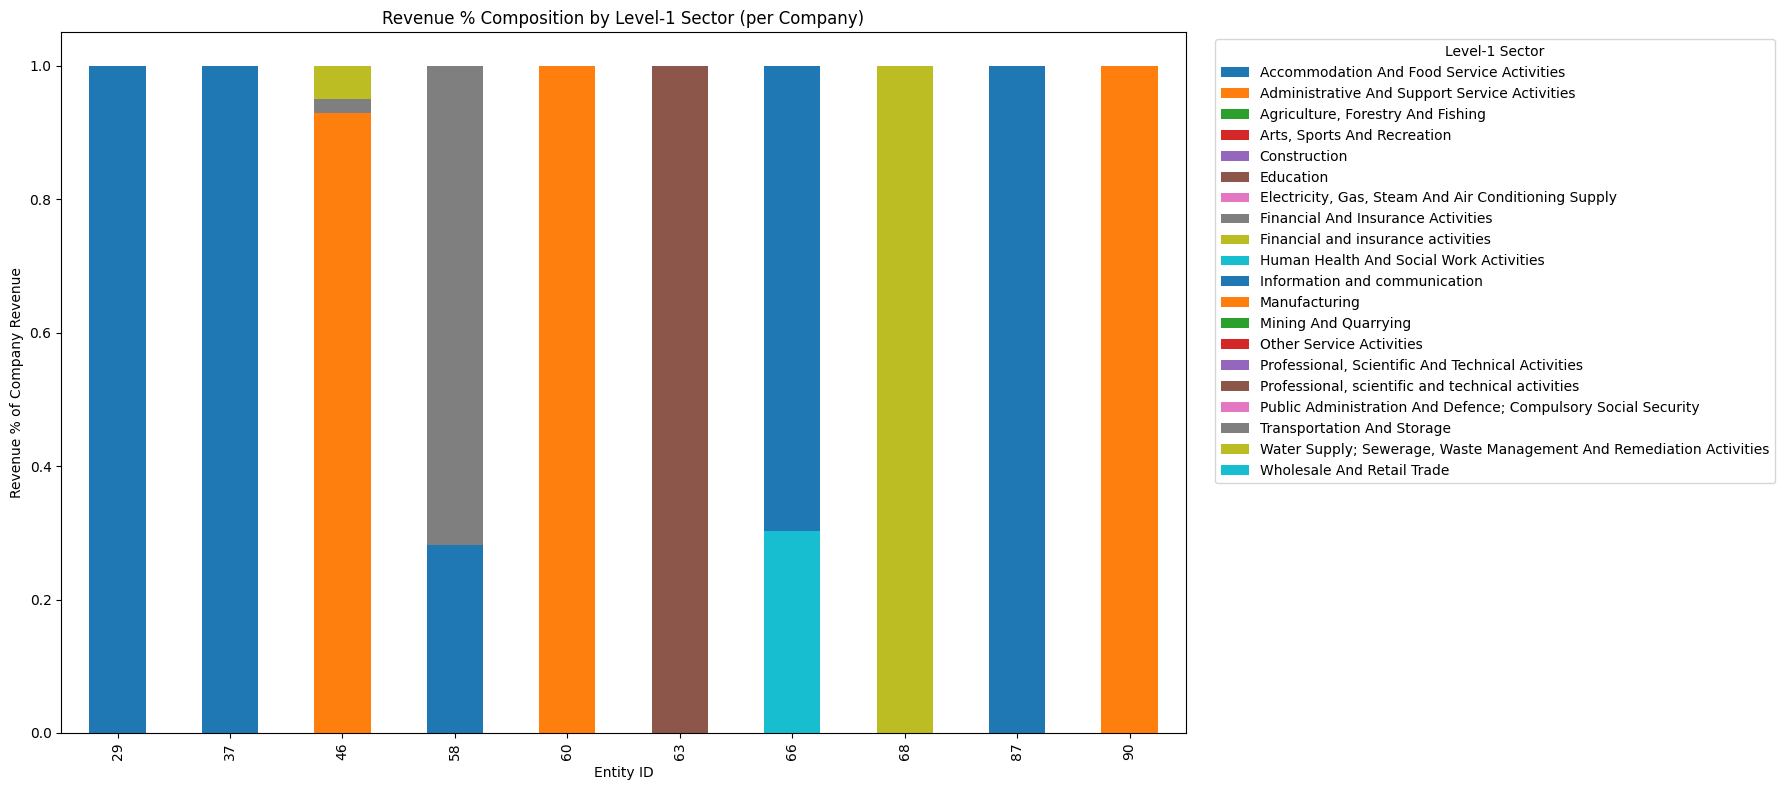

In [10]:
rev_by_entity_lvl1 = (
    df
    .groupby(["entity_id", "nace_level_1_name"])["revenue_pct"]
    .sum()
    .reset_index()
)
entity_lvl1_matrix = rev_by_entity_lvl1.pivot(
    index="entity_id",
    columns="nace_level_1_name",
    values="revenue_pct"
).fillna(0)
row_sums = entity_lvl1_matrix.sum(axis=1)
top_entities = entity_lvl1_matrix.head(10)

plt.figure(figsize=(18, 8))
top_entities.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 8)
)

plt.title("Revenue % Composition by Level-1 Sector (per Company)")
plt.xlabel("Entity ID")
plt.ylabel("Revenue % of Company Revenue")
plt.legend(title="Level-1 Sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/tm/nhkjnn497ns96d08fh2zd95w0000gn/T/ipykernel_33396/2351308453.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(6, "revenue_pct"))


<Figure size 1600x1000 with 0 Axes>

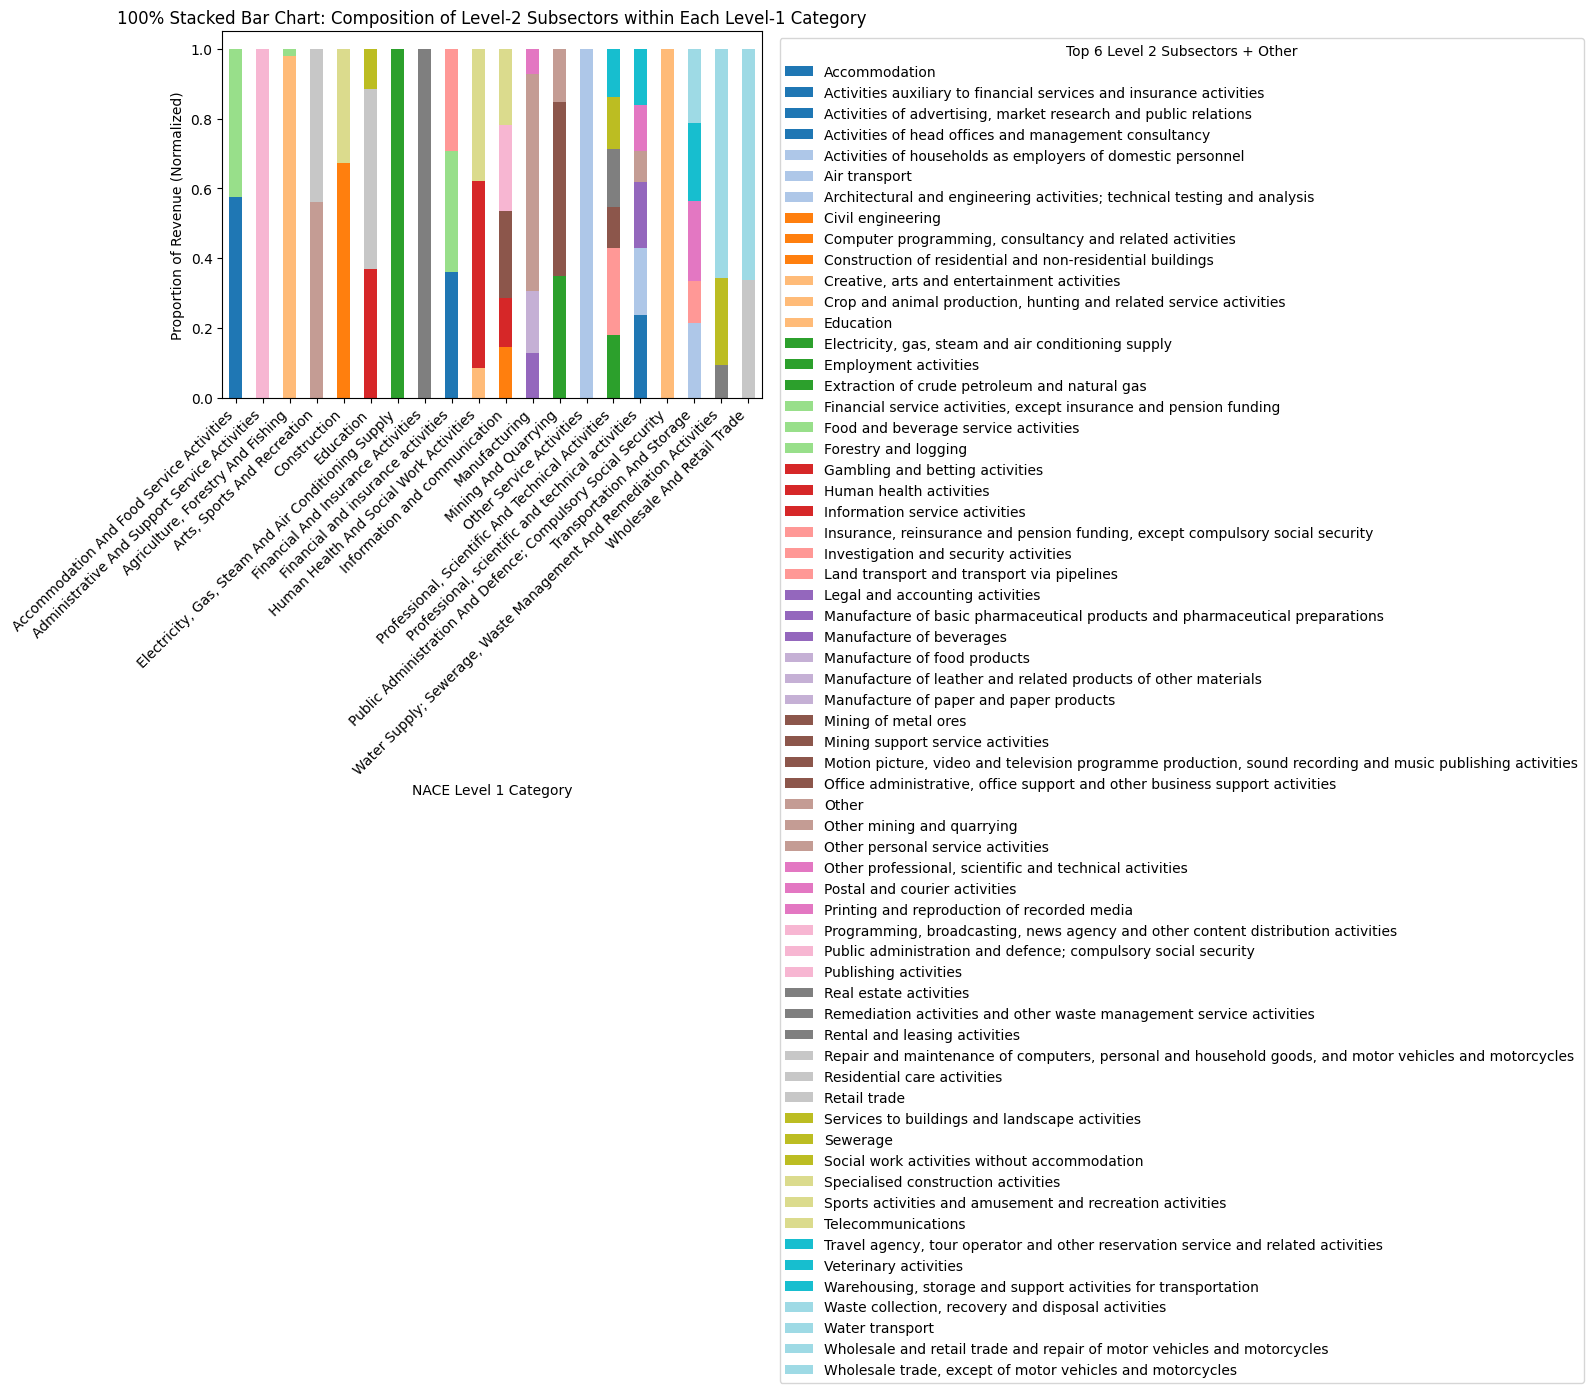

In [12]:
g = (
    df.groupby(["nace_level_1_name", "nace_level_2_name"])["revenue_pct"]
      .mean()
      .reset_index()
)
top5 = (
    g.groupby("nace_level_1_name", group_keys=False)
     .apply(lambda x: x.nlargest(6, "revenue_pct"))
)
other = (
    g.merge(top5, how="outer", indicator=True)
     .query("_merge == 'left_only'")
     .drop(columns=["_merge"])
)

other_grouped = (
    other.groupby("nace_level_1_name")["revenue_pct"]
         .sum()
         .reset_index()
)
other_grouped["nace_level_2_name"] = "Other"
final = pd.concat([top5, other_grouped], ignore_index=True)

pivot = final.pivot(
    index="nace_level_1_name",
    columns="nace_level_2_name",
    values="revenue_pct"
).fillna(0)

pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)
plt.figure(figsize=(16, 10))
pivot_norm.plot(
    kind="bar",
    stacked=True,
    figsize=(16, 10),
    colormap="tab20"
)

plt.title("100% Stacked Bar Chart: Composition of Level-2 Subsectors within Each Level-1 Category")
plt.ylabel("Proportion of Revenue (Normalized)")
plt.xlabel("NACE Level 1 Category")
plt.legend(title="Top 6 Level 2 Subsectors + Other", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
